In [1]:
import pandas as pd
import numpy as np


In [2]:
cr = pd.read_csv(r"D:\imarticus\datasets\CreditRisk.csv")

In [3]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cr.Gender= cr.Gender.fillna('Male')
cr.Married= cr.Married.fillna('Yes')
cr.LoanAmount= cr.LoanAmount.fillna(cr.LoanAmount.median())
cr.Dependents= cr.Dependents.fillna(1)
cr.Self_Employed= cr.Self_Employed.fillna('No')
cr.Loan_Amount_Term= cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.median())
cr.Credit_History= cr.Credit_History.fillna(0)

In [6]:
cr = cr.iloc[:,1:14]

In [7]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#apply lable encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  

cr[cr.select_dtypes(include=['object']).columns] = cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train,test = train_test_split(cr,test_size =.2,random_state = 555)

In [11]:
cr_train_x = train.iloc[:,0:-1]
cr_train_y = train.iloc[:,-1]

cr_test_x = test.iloc[:,0:-1]
cr_test_y = test.iloc[:,-1]

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression()

In [14]:
logreg.fit( cr_train_x , cr_train_y)

LogisticRegression()

In [15]:
pred = logreg.predict(cr_test_x)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
tab1 = confusion_matrix(pred,cr_test_y)
tab1

array([[ 32,  15],
       [ 29, 121]], dtype=int64)

In [18]:
tab1.diagonal()

array([ 32, 121], dtype=int64)

In [19]:
tab1.diagonal().sum()

153

In [20]:
tab1.diagonal().sum()*100/tab1.sum()

77.66497461928934

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(pred,cr_test_y)

0.7766497461928934

In [23]:
from sklearn.metrics import precision_score

In [24]:
precision_score(cr_test_y,pred)

0.8066666666666666

In [25]:
tab2 = confusion_matrix(cr_test_y,pred)
tab2

array([[ 32,  29],
       [ 15, 121]], dtype=int64)

In [26]:
logreg.coef_

array([[ 4.42510921e-02,  3.26532880e-01, -6.03275207e-02,
        -2.35757194e-01,  7.85642601e-02,  1.45237681e-05,
        -4.17088575e-05, -1.83614635e-03, -2.97033024e-03,
         2.34272913e+00,  3.59714485e-01]])

In [27]:
logreg.intercept_

array([0.1768864])

In [28]:
logreg.predict_proba(cr_test_x)  #predictions in probabilities

array([[0.10679674, 0.89320326],
       [0.08546608, 0.91453392],
       [0.15016817, 0.84983183],
       [0.70158287, 0.29841713],
       [0.32253929, 0.67746071],
       [0.15379904, 0.84620096],
       [0.65290718, 0.34709282],
       [0.07741313, 0.92258687],
       [0.14613933, 0.85386067],
       [0.68188794, 0.31811206],
       [0.15199776, 0.84800224],
       [0.13895443, 0.86104557],
       [0.17016874, 0.82983126],
       [0.213824  , 0.786176  ],
       [0.12565695, 0.87434305],
       [0.54455509, 0.45544491],
       [0.10689446, 0.89310554],
       [0.12325738, 0.87674262],
       [0.74443499, 0.25556501],
       [0.19760746, 0.80239254],
       [0.20958731, 0.79041269],
       [0.09721438, 0.90278562],
       [0.19388226, 0.80611774],
       [0.13224416, 0.86775584],
       [0.73740386, 0.26259614],
       [0.73105556, 0.26894444],
       [0.11587705, 0.88412295],
       [0.17808268, 0.82191732],
       [0.63819378, 0.36180622],
       [0.1864879 , 0.8135121 ],
       [0.

In [29]:
pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [31]:
# AUROC value

log_roc_auc = roc_auc_score(cr_test_y,pred)
log_roc_auc

0.7071480231436836

In [32]:
pred_value_prob = logreg.predict_proba(cr_test_x)
pred_value_prob

array([[0.10679674, 0.89320326],
       [0.08546608, 0.91453392],
       [0.15016817, 0.84983183],
       [0.70158287, 0.29841713],
       [0.32253929, 0.67746071],
       [0.15379904, 0.84620096],
       [0.65290718, 0.34709282],
       [0.07741313, 0.92258687],
       [0.14613933, 0.85386067],
       [0.68188794, 0.31811206],
       [0.15199776, 0.84800224],
       [0.13895443, 0.86104557],
       [0.17016874, 0.82983126],
       [0.213824  , 0.786176  ],
       [0.12565695, 0.87434305],
       [0.54455509, 0.45544491],
       [0.10689446, 0.89310554],
       [0.12325738, 0.87674262],
       [0.74443499, 0.25556501],
       [0.19760746, 0.80239254],
       [0.20958731, 0.79041269],
       [0.09721438, 0.90278562],
       [0.19388226, 0.80611774],
       [0.13224416, 0.86775584],
       [0.73740386, 0.26259614],
       [0.73105556, 0.26894444],
       [0.11587705, 0.88412295],
       [0.17808268, 0.82191732],
       [0.63819378, 0.36180622],
       [0.1864879 , 0.8135121 ],
       [0.

In [33]:
pred_value_prob[:,1]

array([0.89320326, 0.91453392, 0.84983183, 0.29841713, 0.67746071,
       0.84620096, 0.34709282, 0.92258687, 0.85386067, 0.31811206,
       0.84800224, 0.86104557, 0.82983126, 0.786176  , 0.87434305,
       0.45544491, 0.89310554, 0.87674262, 0.25556501, 0.80239254,
       0.79041269, 0.90278562, 0.80611774, 0.86775584, 0.26259614,
       0.26894444, 0.88412295, 0.82191732, 0.36180622, 0.8135121 ,
       0.776625  , 0.84575756, 0.80192184, 0.89422479, 0.24549503,
       0.80813292, 0.86481222, 0.77745997, 0.88325071, 0.48585889,
       0.74531   , 0.86927433, 0.86066044, 0.83523724, 0.84934521,
       0.84174491, 0.71239753, 0.28254651, 0.31840176, 0.74828499,
       0.49427095, 0.86422606, 0.37681806, 0.89134518, 0.86866676,
       0.24482825, 0.30092921, 0.8974705 , 0.80613951, 0.23017927,
       0.21998212, 0.88924116, 0.8241463 , 0.87506952, 0.93390152,
       0.79541199, 0.78254239, 0.87398296, 0.84529174, 0.38865755,
       0.41058493, 0.90158896, 0.77367181, 0.8283464 , 0.36324

In [34]:
fpr,tpr,threshold = roc_curve(cr_test_y,pred_value_prob[:,1])

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.01639344, 0.01639344,
       0.03278689, 0.03278689, 0.04918033, 0.04918033, 0.06557377,
       0.06557377, 0.08196721, 0.08196721, 0.09836066, 0.09836066,
       0.1147541 , 0.1147541 , 0.13114754, 0.13114754, 0.16393443,
       0.16393443, 0.19672131, 0.19672131, 0.21311475, 0.21311475,
       0.2295082 , 0.2295082 , 0.24590164, 0.24590164, 0.26229508,
       0.26229508, 0.29508197, 0.29508197, 0.31147541, 0.31147541,
       0.3442623 , 0.3442623 , 0.36065574, 0.36065574, 0.37704918,
       0.37704918, 0.44262295, 0.44262295, 0.45901639, 0.45901639,
       0.47540984, 0.47540984, 0.49180328, 0.49180328, 0.52459016,
       0.52459016, 0.54098361, 0.54098361, 0.57377049, 0.57377049,
       0.72131148, 0.72131148, 0.81967213, 0.81967213, 0.93442623,
       0.93442623, 0.95081967, 0.95081967, 1.        , 1.        ])

In [36]:
tpr

array([0.        , 0.00735294, 0.03676471, 0.03676471, 0.04411765,
       0.04411765, 0.09558824, 0.09558824, 0.10294118, 0.10294118,
       0.13970588, 0.13970588, 0.16911765, 0.16911765, 0.21323529,
       0.21323529, 0.25735294, 0.25735294, 0.52941176, 0.52941176,
       0.55882353, 0.55882353, 0.57352941, 0.57352941, 0.63970588,
       0.63970588, 0.67647059, 0.67647059, 0.68382353, 0.68382353,
       0.69852941, 0.69852941, 0.76470588, 0.76470588, 0.77205882,
       0.77205882, 0.85294118, 0.85294118, 0.86029412, 0.86029412,
       0.86764706, 0.86764706, 0.875     , 0.875     , 0.88970588,
       0.88970588, 0.91911765, 0.91911765, 0.93382353, 0.93382353,
       0.94117647, 0.94117647, 0.94852941, 0.94852941, 0.95588235,
       0.95588235, 0.96323529, 0.96323529, 0.97794118, 0.97794118,
       0.98529412, 0.98529412, 0.99264706, 0.99264706, 1.        ])

In [37]:
import matplotlib.pyplot as plt

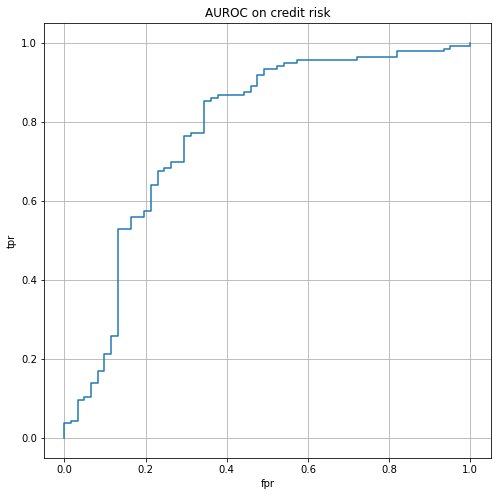

In [38]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on credit risk')
plt.grid()

# With cheat code

In [39]:
Df = cr      # insert your dataframe name between <--->.

from sklearn.model_selection import train_test_split
train,test = train_test_split(Df,test_size =.2,random_state = 555)

train_x = train.iloc[:,0:-1]   # select columns with (x) independent variables
train_y = train.iloc[:,-1]     # select column  with (y) dependent variable

test_x = test.iloc[:,0:-1]     # select columns with (x) independent variables
test_y = test.iloc[:,-1]       # select column  with (y) dependent variable



# issential import for model building
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
#log_reg = LogisticRegression(class_weight ='balanced') # here we have managed to solve class imballence issue

# in above lines select any one model fitting as required

# model fitting
log_reg.fit( train_x , train_y)

# predictions
pred = log_reg.predict(test_x)

# performance metrics
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,test_y)
print('predicted vs actual')
print(tab)

print('diagonal elements')
print(tab.diagonal())
print('sum of diagonal elements')
print(tab.diagonal().sum())

print('overall accuracy')
print(tab.diagonal().sum()*100/tab.sum())

print('accuracy of class zero{TNR}')
print(tab[0,0]/(tab[1,0]+tab[0,0]))

print('accuracy of class one{TPR}')
print(tab[1,1]/(tab[0,1]+tab[1,1]))

print('error for class zero{FPR}')
print(tab[1,0]/(tab[0,1]+tab[0,0]))

print('error for class one')
print(tab[0,1]/(tab[0,1]+tab[1,1]))

print('precision')
print(tab[1,1]/(tab[1,0]+tab[1,1]))

from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)
print('accuracy score')
print(accuracy_score(pred,test_y))

from sklearn.metrics import precision_score
precision_score(test_y,pred)
print('precision score')
print(precision_score(test_y,pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(test_y,pred)
print('Roc_auc',log_roc_auc)
pred_value_prob = log_reg.predict_proba(test_x)

fpr,tpr,threshold = roc_curve(test_y,pred_value_prob[:,1])
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('coefficients-->',log_reg.coef_)
print('intercept-->',log_reg.intercept_)
print('Predict proba-->',log_reg.predict_proba(test_x)) # predictions in probabilities

predicted vs actual
[[ 32  15]
 [ 29 121]]
diagonal elements
[ 32 121]
sum of diagonal elements
153
overall accuracy
77.66497461928934
accuracy of class zero{TNR}
0.5245901639344263
accuracy of class one{TPR}
0.8897058823529411
error for class zero{FPR}
0.6170212765957447
error for class one
0.11029411764705882
precision
0.8066666666666666
accuracy score
0.7766497461928934
precision score
0.8066666666666666
Roc_auc 0.7071480231436836
FPR
[0.         0.         0.         0.01639344 0.01639344 0.03278689
 0.03278689 0.04918033 0.04918033 0.06557377 0.06557377 0.08196721
 0.08196721 0.09836066 0.09836066 0.1147541  0.1147541  0.13114754
 0.13114754 0.16393443 0.16393443 0.19672131 0.19672131 0.21311475
 0.21311475 0.2295082  0.2295082  0.24590164 0.24590164 0.26229508
 0.26229508 0.29508197 0.29508197 0.31147541 0.31147541 0.3442623
 0.3442623  0.36065574 0.36065574 0.37704918 0.37704918 0.44262295
 0.44262295 0.45901639 0.45901639 0.47540984 0.47540984 0.49180328
 0.49180328 0.52459016 

# Plot AUROC 

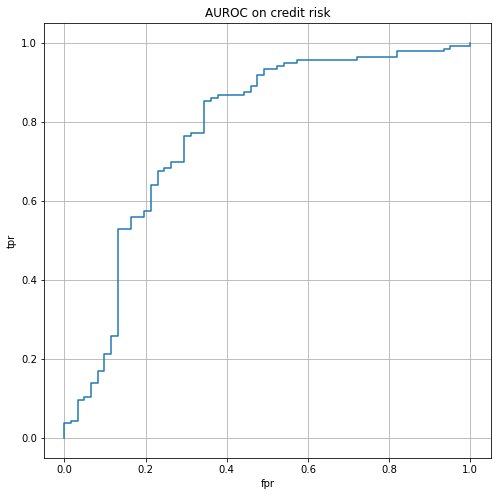

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on credit risk')
plt.grid()

# Decision tree 

In [41]:
Df = cr      # insert your dataframe name between <--->.

from sklearn.model_selection import train_test_split
train,test = train_test_split(Df,test_size =.2,random_state = 555)

train_x = train.iloc[:,0:-1]   # select columns with (x) independent variables
train_y = train.iloc[:,-1]     # select column  with (y) dependent variable

test_x = test.iloc[:,0:-1]     # select columns with (x) independent variables
test_y = test.iloc[:,-1]       # select column  with (y) dependent variable

# issential import for model building
from sklearn.tree import DecisionTreeClassifier

Dec_tree = DecisionTreeClassifier()

# model fitting
Dec_tree.fit( train_x , train_y)

# predictions
pred = Dec_tree.predict(test_x)

# performance metrics
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,test_y)
print('predicted vs actual')
print(tab)

print('diagonal elements')
print(tab.diagonal())
print('sum of diagonal elements')
print(tab.diagonal().sum())

print('overall accuracy')
print(tab.diagonal().sum()*100/tab.sum())

print('accuracy of class zero{TNR}')
print(tab[0,0]/(tab[1,0]+tab[0,0]))

print('accuracy of class one{TPR}')
print(tab[1,1]/(tab[0,1]+tab[1,1]))

print('error for class zero{FPR}')
print(tab[1,0]/(tab[0,1]+tab[0,0]))

print('error for class one')
print(tab[0,1]/(tab[0,1]+tab[1,1]))

print('precision')
print(tab[1,1]/(tab[1,0]+tab[1,1]))

from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)
print('accuracy score')
print(accuracy_score(pred,test_y))

from sklearn.metrics import precision_score
precision_score(test_y,pred)
print('precision score')
print(precision_score(test_y,pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(test_y,pred)

pred_value_prob = Dec_tree.predict_proba(test_x)

fpr,tpr,threshold = roc_curve(test_y,pred_value_prob[:,1])




print('Predict proba-->',Dec_tree.predict_proba(test_x)) # predictions in probabilities

predicted vs actual
[[ 37  33]
 [ 24 103]]
diagonal elements
[ 37 103]
sum of diagonal elements
140
overall accuracy
71.06598984771574
accuracy of class zero{TNR}
0.6065573770491803
accuracy of class one{TPR}
0.7573529411764706
error for class zero{FPR}
0.34285714285714286
error for class one
0.2426470588235294
precision
0.8110236220472441
accuracy score
0.7106598984771574
precision score
0.8110236220472441
Predict proba--> [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 

# Decision tree

In [42]:
Df = cr      # insert your dataframe name between <--->.

from sklearn.model_selection import train_test_split
train,test = train_test_split(Df,test_size =.2,random_state = 555)

train_x = train.iloc[:,0:-1]   # select columns with (x) independent variables
train_y = train.iloc[:,-1]     # select column  with (y) dependent variable

test_x = test.iloc[:,0:-1]     # select columns with (x) independent variables
test_y = test.iloc[:,-1]       # select column  with (y) dependent variable

# issential import for model building
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
#log_reg = LogisticRegression(class_weight ='balanced') # here we have managed to solve class imballence issue

# in above lines select any one model fitting as required

# model fitting
DT.fit( train_x , train_y)

# predictions
pred = DT.predict(test_x)

# performance metrics
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,test_y)
print('predicted vs actual')
print(tab)

print('diagonal elements')
print(tab.diagonal())
print('sum of diagonal elements')
print(tab.diagonal().sum())

print('overall accuracy')
print(tab.diagonal().sum()*100/tab.sum())

print('accuracy of class zero{TNR}')
print(tab[0,0]/(tab[1,0]+tab[0,0]))

print('accuracy of class one{TPR}')
print(tab[1,1]/(tab[0,1]+tab[1,1]))

print('error for class zero{FPR}')
print(tab[1,0]/(tab[0,1]+tab[0,0]))

print('error for class one')
print(tab[0,1]/(tab[0,1]+tab[1,1]))

print('precision')
print(tab[1,1]/(tab[1,0]+tab[1,1]))

from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)
print('accuracy score')
print(accuracy_score(pred,test_y))

from sklearn.metrics import precision_score
precision_score(test_y,pred)
print('precision score')
print(precision_score(test_y,pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(test_y,pred)

pred_value_prob = DT.predict_proba(test_x)

fpr,tpr,threshold = roc_curve(test_y,pred_value_prob[:,1])




print('Predict proba-->',DT.predict_proba(test_x)) # predictions in probabilities

predicted vs actual
[[35 43]
 [26 93]]
diagonal elements
[35 93]
sum of diagonal elements
128
overall accuracy
64.9746192893401
accuracy of class zero{TNR}
0.5737704918032787
accuracy of class one{TPR}
0.6838235294117647
error for class zero{FPR}
0.3333333333333333
error for class one
0.3161764705882353
precision
0.7815126050420168
accuracy score
0.649746192893401
precision score
0.7815126050420168
Predict proba--> [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 

In [43]:
DT.feature_importances_ 

array([0.00740038, 0.02443623, 0.03748871, 0.0087449 , 0.01211815,
       0.29189068, 0.11744695, 0.1698802 , 0.02993623, 0.26889297,
       0.03176458])

In [44]:
len(DT.feature_importances_)

11

In [45]:
train.shape

(784, 12)

In [46]:
DT.feature_importances_.sum()

1.0

In [49]:
feature_importances = pd.DataFrame({"Feature" : train_x.columns  , "Importance" : DT.feature_importances_})



In [50]:
feature_importances.sort_values('Importance' , ascending = False)

,Feature,Importance
5,ApplicantIncome,0.291891
9,Credit_History,0.268893
7,LoanAmount,0.169880
6,CoapplicantIncome,0.117447
2,Dependents,0.037489
10,Property_Area,0.031765
8,Loan_Amount_Term,0.029936
1,Married,0.024436
4,Self_Employed,0.012118
3,Education,0.008745


# KNN 

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train,test = train_test_split(cr,test_size =.2,random_state = 555)

In [53]:
cr_train_x = train.iloc[:,0:-1]
cr_train_y = train.iloc[:,-1]

cr_test_x = test.iloc[:,0:-1]
cr_test_y = test.iloc[:,-1]

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier( n_neighbors= 33)

In [56]:
knn.fit(cr_train_x,cr_train_y)

KNeighborsClassifier(n_neighbors=33)

In [57]:
knn_pred = knn.predict(cr_test_x)

In [58]:
from sklearn.metrics import confusion_matrix

In [60]:
tab_knn = confusion_matrix(knn_pred,cr_test_y)
tab_knn

array([[  0,   0],
       [ 61, 136]], dtype=int64)

In [61]:
acc = tab_knn.diagonal().sum()*100/tab_knn.sum()
acc

69.03553299492386

In [62]:
empty_list =[]
num = list(range(1,100))
for k in range(1,100):
    knn = KNeighborsClassifier( n_neighbors= k)
    knn.fit(cr_train_x,cr_train_y)
    knn_pred = knn.predict(cr_test_x)
    tab_knn = confusion_matrix(knn_pred,cr_test_y)
    acc = tab_knn.diagonal().sum()*100/tab_knn.sum()
    acc = np.round(acc,2)
    empty_list.append(acc)
    print(empty_list)

[61.93]
[61.93, 56.35]
[61.93, 56.35, 65.99]
[61.93, 56.35, 65.99, 62.44]
[61.93, 56.35, 65.99, 62.44, 66.5]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51, 67.01]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67

[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51, 67.01, 67.51, 66.5, 67.51, 67.01, 68.53, 69.04, 69.04, 69.54, 69.54, 70.56, 68.53, 68.53, 69.54, 69.04, 68.53, 68.53, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51, 67.01, 67.51, 66.5, 67.51, 67.01, 68.53, 69.04, 69.04, 69.54, 69.54, 70.56, 68.53, 68.53, 69.54, 69.04, 68.53, 68.53, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 6

[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51, 67.01, 67.51, 66.5, 67.51, 67.01, 68.53, 69.04, 69.04, 69.54, 69.54, 70.56, 68.53, 68.53, 69.54, 69.04, 68.53, 68.53, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51, 67.01, 67.51, 66.5, 67.51, 67.01, 68.53, 69.04, 69.04, 69.54, 69.54, 70.56, 68.53, 68.53, 69.54, 69.04, 68.53, 68.53, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 6

[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51, 67.01, 67.51, 66.5, 67.51, 67.01, 68.53, 69.04, 69.04, 69.54, 69.54, 70.56, 68.53, 68.53, 69.54, 69.04, 68.53, 68.53, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04]
[61.93, 56.35, 65.99, 62.44, 66.5, 62.94, 67.01, 65.48, 68.02, 65.99, 67.01, 67.51, 68.53, 67.51, 67.51, 67.01, 67.51, 66.5, 67.51, 67.01, 68.53, 69.04, 69.04, 69.54, 69.54, 70.56, 68.53, 68.53, 69.54, 69.04, 68.53, 68.53, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 69.04, 6

In [63]:
import matplotlib.pyplot as plt

Text(32, 69, 'B')

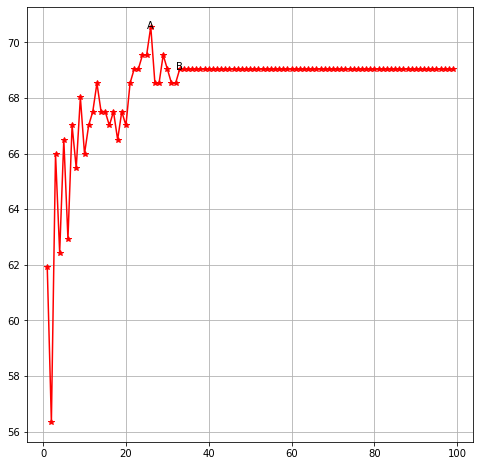

In [64]:
plt.figure(figsize=(8,8))
plt.plot(num ,empty_list, color ='r',marker ='*')
plt.grid()
plt.text(25,70.5,"A",size=10)
plt.text(32,69,"B",size=10)
